In [1]:
import mylibrary
import math
from matplotlib import pyplot as plt

Question 1

In [3]:
#function given: (x-5)e^x + 5
f1 = lambda x: (x-5)*math.exp(x) + 5

#setting constants
h = 6.626*10**(-34)
k = 1.381*10**(-23)
c = 3*10**(8) 

prec = 10*(-4) #choosing a precision value

#picking a guess for the root
lower_lim = 2
upper_lim = 5

#checking bracket for root
brac = mylibrary.bracket(f1,lower_lim,upper_lim)
print("Bracket containing the root of the function is:" + str(brac))

Bracket containing the root of the function is:(2, 5)


In [4]:
#calling Newton-Raphson function to find root
r1, i1, err1 = mylibrary.newtonraphson(f1,5,prec) #putting the upper bound guess as 5
print("The root for the function within the specified interval is = " + str(r1))

The root for the function within the specified interval is = 4.965113134432163


In [7]:
print("From the given expression in the question, we see b = (h*c)/(x*k)")
print("where x is the value of the root found")
print()
print("Therefore, Wein's constant, b = " + str((h*c)/(r1*k)))

From the given expression in the question, we see b = (h*c)/(x*k)
where x is the value of the root found

Therefore, Wein's constant, b = 0.0028990109714324853


Question 2

In [14]:
#defining constants for the question
L = 1
g = 9.8
k = 4*(L/g)**0.5
a = math.sin(math.pi/8)

#defining the integrand
def integrand(phi):
    f = 1/(1-(a*math.sin(phi)))**0.5
    return f

In [18]:
a = 0         #lower bound
b = math.pi/2 #upper bound
N = 10        #as specified in the question
integral = k*mylibrary.Simpson(a,b,integrand,N)
print("The value of T for N = 10, using Simpson method is", integral)

The value of T for N = 10, using Simpson method is 2.007089923154493


Question 3

In [2]:
#setting up the constants for the problem
y0 = 2
y5 = 45

def y2dot(t, y, u):
    return -9.8

def ydot(t, y, u):
    return u

At t=0, the velocity of the rocket was 33.09999999999992


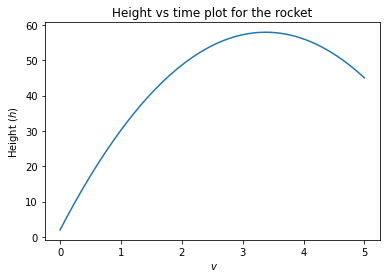

In [8]:
stepsize = 0.01
t_initial = 0
t_final = 5
tol = 0.000001

T, Y, Z = mylibrary.Shooting(y2dot, ydot, t_initial, y0, t_final, y5, 10, 100, stepsize, tol)
print("At t=0, the velocity of the rocket was", Z[0])

plt.plot(T,Y)
plt.xlabel(" $v$")
plt.ylabel("Height $(h)$")
plt.title("Height vs time plot for the rocket")
plt.show()

Question 4

In [ ]:
matrix = open("esem_fit2.dat", "r+")


x = []
y = []

for row in matrix:
    e1 = row.split()
    x.append(float(e1[0]))
    y.append(float(e1[1]))

#defining the sums in Y
sum_hr0 = 0
sum_hr1 = 0
sum_hr2 = 0
for i in range(len(x)):
    sum_hr0 = sum_hr0 + y[i]*x[i]**0
for i in range(len(x)):
    sum_hr1 = sum_hr1 + y[i]*x[i]**1
for i in range(len(x)):
    sum_hr2 = sum_hr2 + y[i]*x[i]**2

Y = [[sum_hr0], [sum_hr1], [sum_hr2]]


#defining the suns in X
sum_r0 = 0
sum_r1 = 0
sum_r2 = 0
sum_r3 = 0
sum_r4 = 0
for i in range(len(x)):
    sum_r0 = sum_r0 + x[i]**0
for i in range(len(x)):
    sum_r1 = sum_r1 + x[i]**1
for i in range(len(x)):
    sum_r2 = sum_r2 + x[i]**2
for i in range(len(x)):
    sum_r3 = sum_r3 + x[i]**3
for i in range(len(x)):
    sum_r4 = sum_r4 + x[i]**4

X = [[sum_r0, sum_r1, sum_r2], [sum_r1, sum_r2, sum_r3], [sum_r2, sum_r3, sum_r4]]

X_inv = mylibrary.polyfit_inverse(X)

P = mylibrary.productMatrix(X_inv, Y)

r_max = -(P[1][0])/(2*P[2][0])

h_max = P[0][0] + P[1][0]*r_max + P[2][0]*(r_max)**2

print("The maximum height is attained at r =", r_max)
print("The maximum height attained is h =", h_max, "m")

Question 5

In [ ]:
matrix = open("esem_fit1.dat", "r+")
x = []
y = []

for row in matrix:
    e1 = row.split()
    x.append(float(e1[0]))
    y.append(float(e1[1]))


#part(i)
y1 = []
for i in range(len(y)):
    y1.append(math.log(y[i]))
m, c, r = linear_fitting(x, y1)
alpha = m
sigma0 = math.exp(c)
print("In part-i, the values of alpha and sigma_0 are: " + str(alpha) + ' and ' + str(sigma0))
print('The r value is: ' + str(r))
#part(ii)
x2 = []
y2 = []
for i in range(len(x)):
    x2.append(math.log(x[i]))
    y2.append(math.log(y[i]))
m,c,r = linear_fitting(x2,y2)
alpha = m 
sigma0 = math.exp(c)
print("In part-ii, the values of alpha and sigma_0 are: " + str(alpha) + ' and ' + str(sigma0))
print('The r value is: ' + str(r))